In [1]:
from helper import Helper
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h = Helper()

train_it, validation_it, test_it = h.construct_data_generator_w_validation()

Found 22050 images belonging to 3 classes.
Found 3150 images belonging to 3 classes.
Found 6300 images belonging to 3 classes.


In [3]:
def build_model(optimizer, loss, name):
    model = Sequential(name=name)
    
    model.add(Conv2D(32, (5,5), input_shape = (224, 224, 3), activation = 'relu'))
    model.add(Conv2D(32, (5,5), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (5,5), activation = 'relu'))
    model.add(Conv2D(64, (5,5), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.summary()
    
    return model

In [4]:
opt = Adam(learning_rate=0.0001)
loss = 'categorical_crossentropy'

In [5]:
tblog_path = h.logs_directory.format(time())
tb_log = TensorBoard(log_dir = tblog_path, profile_batch=0)

In [6]:
model = build_model(opt, loss, 'cnn_topomap_classification_model_vgg_100')

Model: "cnn_topomap_classification_model_vgg_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 216, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 108, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 108, 108, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 104, 104, 64)      51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      102464    
_________________________________________________________________
max_pooling2d_1 (MaxPoolin

In [7]:
r = model.fit_generator(train_it, epochs=100, callbacks=[tb_log], validation_data=validation_it)

Epoch 1/100
173/173 [==============================] - 168s 972ms/step - loss: 1.0961 - accuracy: 0.3796 - val_loss: 1.0384 - val_accuracy: 0.4597
Epoch 2/100
173/173 [==============================] - 163s 943ms/step - loss: 0.9341 - accuracy: 0.5312 - val_loss: 0.7854 - val_accuracy: 0.6467
Epoch 3/100
173/173 [==============================] - 164s 946ms/step - loss: 0.7543 - accuracy: 0.6517 - val_loss: 0.6531 - val_accuracy: 0.7092
Epoch 4/100
173/173 [==============================] - 164s 950ms/step - loss: 0.6520 - accuracy: 0.7059 - val_loss: 0.5462 - val_accuracy: 0.7670
Epoch 5/100
173/173 [==============================] - 164s 949ms/step - loss: 0.5899 - accuracy: 0.7409 - val_loss: 0.4999 - val_accuracy: 0.7892
Epoch 6/100
173/173 [==============================] - 165s 951ms/step - loss: 0.5376 - accuracy: 0.7663 - val_loss: 0.4604 - val_accuracy: 0.8048
Epoch 7/100
173/173 [==============================] - 165s 954ms/step - loss: 0.4967 - accuracy: 0.7875 - val_loss: 0

173/173 [==============================] - 164s 946ms/step - loss: 0.1309 - accuracy: 0.9478 - val_loss: 0.3011 - val_accuracy: 0.8987
Epoch 57/100
173/173 [==============================] - 164s 946ms/step - loss: 0.1516 - accuracy: 0.9396 - val_loss: 0.2742 - val_accuracy: 0.9114
Epoch 58/100
173/173 [==============================] - 163s 945ms/step - loss: 0.1291 - accuracy: 0.9482 - val_loss: 0.2577 - val_accuracy: 0.9146
Epoch 59/100
173/173 [==============================] - 164s 947ms/step - loss: 0.1138 - accuracy: 0.9523 - val_loss: 0.2655 - val_accuracy: 0.9156
Epoch 60/100
173/173 [==============================] - 164s 947ms/step - loss: 0.1149 - accuracy: 0.9536 - val_loss: 0.2782 - val_accuracy: 0.9143
Epoch 61/100
173/173 [==============================] - 164s 947ms/step - loss: 0.1141 - accuracy: 0.9565 - val_loss: 0.2792 - val_accuracy: 0.9162
Epoch 62/100
173/173 [==============================] - 164s 947ms/step - loss: 0.1184 - accuracy: 0.9517 - val_loss: 0.2707 

In [8]:
evaluate = model.evaluate_generator(test_it)

In [9]:
y_prob = model.predict_generator(test_it)

In [10]:
h.save(model, r, evaluate, y_prob, 'cnn_topomap_classification_model_vgg_100')

model saved, path: models/cnn_topomap_classification_model_vgg_100.h5


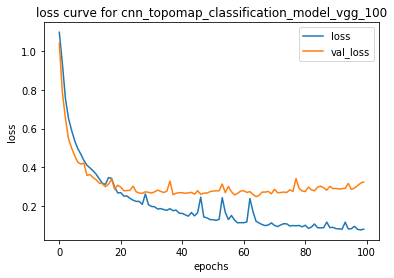

In [11]:
plt.figure()

plt.title('loss curve for cnn_topomap_classification_model_vgg_100')

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig('results/loss curve for cnn_topomap_classification_model_vgg_100.png')

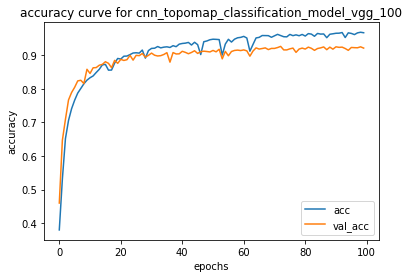

In [12]:
plt.figure()

plt.title('accuracy curve for cnn_topomap_classification_model_vgg_100')

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.savefig('results/accuracy curve for cnn_topomap_classification_model_vgg_100.png')